In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.impute import KNNImputer
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

## Exploratory Analysis

In [2]:
tr = pd.read_csv('train.csv', index_col = 0)
te = pd.read_csv('test.csv')

In [3]:
tr.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
tr.describe()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
tr.shape

(1460, 80)

In [6]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1460 entries, 1 to 1460
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

<AxesSubplot:ylabel='Density'>

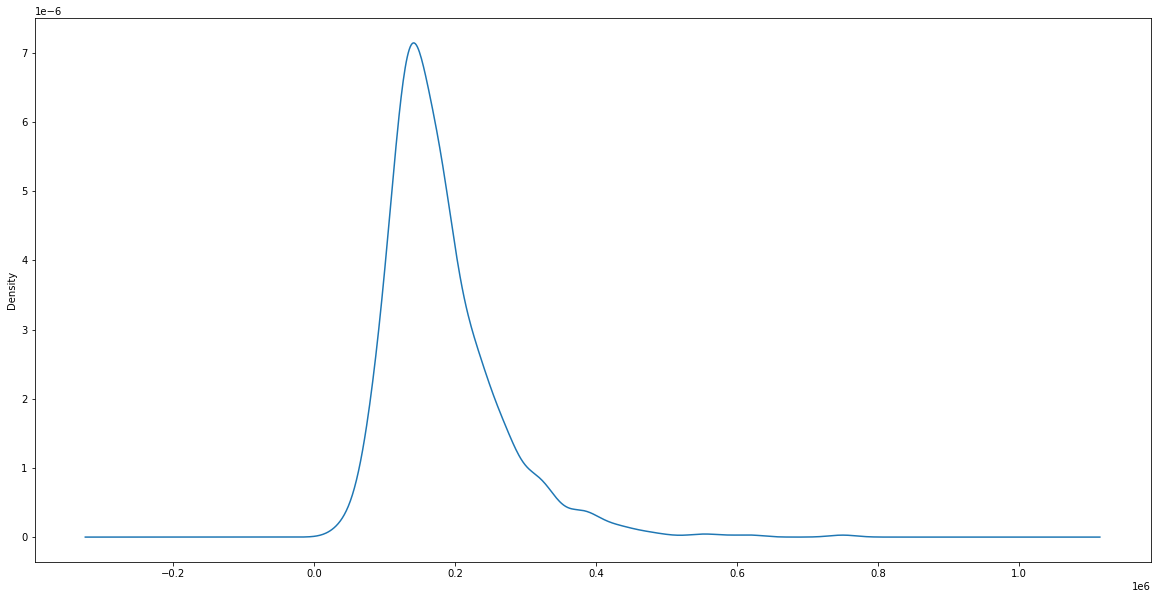

In [7]:
tr['SalePrice'].plot(kind='kde', figsize = (20,10))

<AxesSubplot:ylabel='Frequency'>

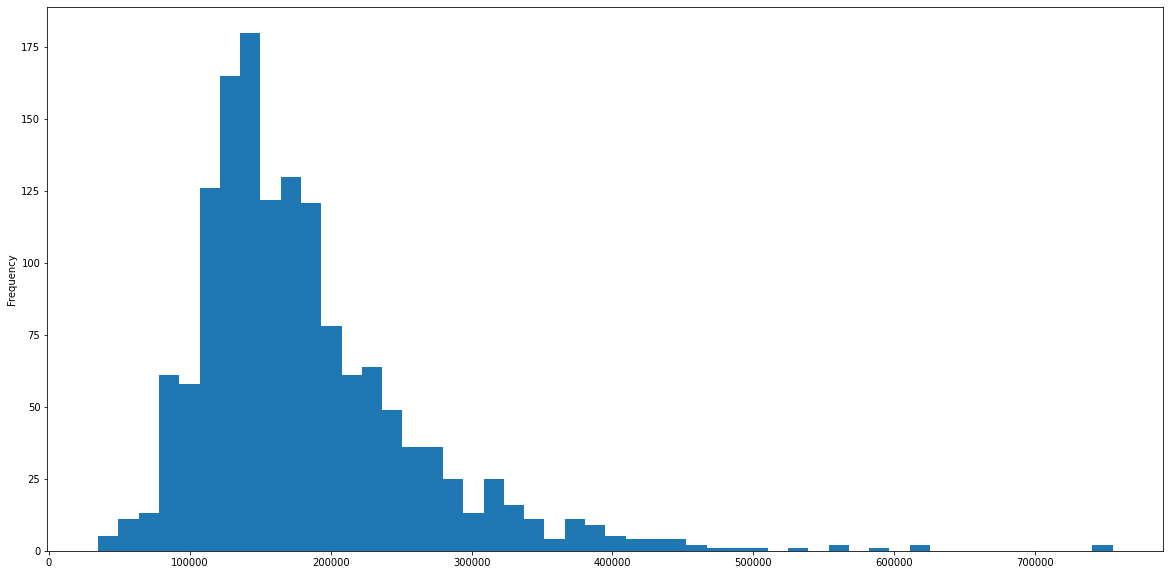

In [8]:
tr['SalePrice'].plot(kind='hist', figsize = (20,10), bins =50)

## Inspect missingness

In [9]:
missing = np.sum(tr.isnull())
missing[missing>0].sort_values(ascending = False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [10]:
(missing[missing>0]/tr.shape[0]).sort_values(ascending = False)
#drop top 3 features: PoolQC, MiscFeature, Alley

PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageYrBlt     0.055479
GarageType      0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtFinType2    0.026027
BsmtExposure    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType      0.005479
Electrical      0.000685
dtype: float64

**Drop PoolQC, MiscFeature and Alley because >90% of dataset do not have these values. Any correlation would be based on limited sample size. Drop PoolArea as well because of expected multicolinearity with PoolQC.**

In [11]:
tr = tr.drop(['PoolQC', 'PoolArea', 'MiscFeature', 'Alley'], axis = 1)

## Drop expected multicolinear features

In [12]:
tr['OverallSF'] = tr['TotalBsmtSF'] + tr['GrLivArea']
tr['TotalBaths'] = tr['FullBath'] + tr['BsmtFullBath'] + 0.5 * (tr['HalfBath'] + tr['BsmtHalfBath'])

In [13]:
tr.drop(['GarageCars', 'GarageYrBlt', 'YearRemodAdd', 'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'MasVnrArea'], axis = 1, inplace= True)

**Create new features OverallSF and TotalBaths. Drop all features relating to individual space SFs and individual baths due to expected multicolinearity. Drop "Condition" features that overlap with "Quality" features.**

In [14]:
numerical = tr.select_dtypes(include=['int64','float'])
numerical.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice', 'OverallSF', 'TotalBaths'],
      dtype='object')

## Inspect value counts of categorical variables

In [15]:
categorical = tr.select_dtypes(include=['object'])
categorical.columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

In [16]:
for i in range(0, len(categorical.columns)):
    print(categorical.iloc[:,i].value_counts())

RL         1151
RM          218
FV           65
RH           16
C (all)      10
Name: MSZoning, dtype: int64
Pave    1454
Grvl       6
Name: Street, dtype: int64
Reg    925
IR1    484
IR2     41
IR3     10
Name: LotShape, dtype: int64
Lvl    1311
Bnk      63
HLS      50
Low      36
Name: LandContour, dtype: int64
AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64
Inside     1052
Corner      263
CulDSac      94
FR2          47
FR3           4
Name: LotConfig, dtype: int64
Gtl    1382
Mod      65
Sev      13
Name: LandSlope, dtype: int64
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
Norm      1260
Feedr       81
Artery     

**Drop Street, Utilities, Condition1, Condition2, RoofMatl, Heating, GarageQual, GarageCond as categorical variables since they all have a variable that is > 95% dominant.**

In [17]:
tr.drop(['Street', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'Electrical'], axis = 1, inplace= True)

In [18]:
categorical = tr.select_dtypes(include=['object'])
categorical.columns

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'HeatingQC',
       'CentralAir', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'PavedDrive', 'Fence', 'SaleType', 'SaleCondition'],
      dtype='object')

## Impute missingness

In [19]:
missing = np.sum(tr.isnull())
missing[missing>0].sort_values(ascending = False)

Fence           1179
FireplaceQu      690
LotFrontage      259
GarageFinish      81
GarageType        81
BsmtQual          37
MasVnrType         8
dtype: int64

In [20]:
tr['Fence'] = tr['Fence'].fillna('NE')
tr['FireplaceQu'] = tr['FireplaceQu'].fillna('TA')
tr['GarageType'] = tr['GarageType'].fillna('NE')
tr['GarageFinish'] = tr['GarageFinish'].fillna('NE')
tr['BsmtQual'] = tr['BsmtQual'].fillna('TA')
tr['MasVnrType'] = tr['MasVnrType'].fillna('None')


In [21]:
corrMatrix = tr.corr()
corrMatrix['LotFrontage'].sort_values(ascending = False)

LotFrontage     1.000000
OverallSF       0.462352
LotArea         0.426095
SalePrice       0.351799
GarageArea      0.344997
Fireplaces      0.266639
BedroomAbvGr    0.263170
OverallQual     0.251646
TotalBaths      0.220092
YearBuilt       0.123349
MoSold          0.011200
YrSold          0.007450
MiscVal         0.003368
KitchenAbvGr   -0.006069
OverallCond    -0.059213
MSSubClass     -0.386347
Name: LotFrontage, dtype: float64

In [22]:
LotFrontage = tr['LotFrontage'].tolist()
OverallSF = tr['OverallSF'].tolist()
LotArea = tr['LotArea'].tolist()
data = {'LotFrontage': LotFrontage, 'OverallSF': OverallSF, 'LotArea' :LotArea}

In [23]:
lot = pd.DataFrame(data)
lot

,LotFrontage,OverallSF,LotArea
0,65.0,2566,8450
1,80.0,2524,9600
2,68.0,2706,11250
3,60.0,2473,9550
4,84.0,3343,14260
...,...,...,...
1455,62.0,2600,7917
1456,85.0,3615,13175
1457,66.0,3492,9042
1458,68.0,2156,9717


In [24]:
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(1, 1461))

In [25]:
tr['LotFrontage'] = lot_imputed['LotFrontage']

In [26]:
missing = np.sum(tr.isnull())
missing[missing>0].sort_values(ascending = False)

Series([], dtype: int64)

No more missing values, all values are imputed accordingly.

In [27]:
tr.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'LotShape',
       'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'RoofStyle',
       'Exterior1st', 'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual',
       'HeatingQC', 'CentralAir', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageArea', 'PavedDrive', 'Fence', 'MiscVal',
       'MoSold', 'YrSold', 'SaleType', 'SaleCondition', 'SalePrice',
       'OverallSF', 'TotalBaths'],
      dtype='object')

## Dummify nominal categorical variables

In [28]:
tr['LotShape'] =  tr.LotShape.map(lambda x: 0 if x == 'Reg' else 1) #return 0 if regular lot shape, 1 if irregular
tr['LandContour'] =  tr.LandContour.map(lambda x: 0 if x == 'Lvl' else 1) #return 0 if flat land contour, 1 if non-flat
tr['LandSlope'] = tr.LandSlope.map(lambda x: 0 if x == 'Gtl' else 1) #return 0 if gentle slope, 1 if moderate/severe
tr['GarageFinish'] =  tr.GarageFinish.map(lambda x: 1 if x == 'Fin' or x == 'RFn' else 0) #return 1 if finished, 0 if non-finished
tr['CentralAir'] =  tr.CentralAir.map(lambda x: 1 if x == 'Y' else 0) #return 1 if Y, 0 if N
tr['PavedDrive'] =  tr.PavedDrive.map(lambda x: 1 if x == 'Y' else 0) #return 1 if paved driveway, 0 if non-paved
tr['Functional'] =  tr.Functional.map(lambda x: 1 if x == 'Typ' else 0) #return 1 if typical, 0 if deductions
tr['Fence'] =  tr.Fence.map(lambda x: 0 if x == 'Ne' else 1) #return 0 if no fence, 1 if fence


In [29]:
print(tr['Neighborhood'].value_counts())
print(tr.groupby('Neighborhood')[['SalePrice']].mean().sort_values(by='SalePrice',ascending=False))

NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
SWISU       25
StoneBr     25
Blmngtn     17
MeadowV     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64
                  SalePrice
Neighborhood               
NoRidge       335295.317073
NridgHt       316270.623377
StoneBr       310499.000000
Timber        242247.447368
Veenker       238772.727273
Somerst       225379.837209
ClearCr       212565.428571
Crawfor       210624.725490
CollgCr       197965.773333
Blmngtn       194870.882353
Gilbert       192854.506329
NWAmes        189050.068493
SawyerW       186555.796610
Mitchel       156270.122449
NAmes         145847.080000
NPkVill       142694.444444
SWISU         142591.360000
Blueste       137500.000000
Sawyer        136793.135135
OldT

In [30]:
# Convert Neighborhood into dummified ordinal var based on tiers of mean sale price.

tr['Neighborhood'] = tr['Neighborhood'].map(lambda x: np.where(x in ["NoRidge","NridgHt","StoneBr"],2, np.where(x in ["Timber", "Veenker",
"Somerst","ClearCr","Crawfor","CollgCr","Blmngtn","Gilbert","NWAmes","SawyerW"],1, 0)))

In [31]:
dummy1 = pd.get_dummies(tr.Foundation, prefix='Foundation')
dummy1.drop(['Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood'], axis = 1, inplace= True)
dummy2 = pd.get_dummies(tr.SaleType, prefix='SaleType')
dummy2.drop(['SaleType_COD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_CWD', 'SaleType_Oth', 'SaleType_Con'], axis = 1, inplace= True)
dummy3 = pd.get_dummies(tr.SaleCondition, prefix='SaleCondition')
dummy3.drop(['SaleCondition_Family', 'SaleCondition_Alloca', 'SaleCondition_AdjLand'], axis = 1, inplace= True)
dummy4 = pd.get_dummies(tr.RoofStyle, prefix='Roof')
dummy4.drop(['Roof_Flat', 'Roof_Gambrel', 'Roof_Mansard', 'Roof_Shed'], axis = 1, inplace= True)
dummy5 = pd.get_dummies(tr.Exterior1st, prefix='Ex1')
dummy5.drop(['Ex1_CemntBd', 'Ex1_BrkFace', 'Ex1_WdShing', 'Ex1_Stucco', 'Ex1_AsbShng', 'Ex1_BrkComm', 'Ex1_Stone', 'Ex1_AsphShn', 'Ex1_CBlock', 'Ex1_ImStucc'], axis = 1, inplace= True)
dummy6 = pd.get_dummies(tr.MSSubClass, prefix='MS_subclass')
dummy6.drop(['MS_subclass_30', 'MS_subclass_160', 'MS_subclass_70', 'MS_subclass_80', 'MS_subclass_90', 'MS_subclass_190', 'MS_subclass_85', 'MS_subclass_75', 'MS_subclass_45', 'MS_subclass_180', 'MS_subclass_40'], axis = 1, inplace= True)
dummy7 = pd.get_dummies(tr.MSZoning, prefix='Zoning')
dummy7.drop(['Zoning_FV', 'Zoning_RH', 'Zoning_C (all)'], axis = 1, inplace= True)
dummy8 = pd.get_dummies(tr.BldgType, prefix='BldgType')
dummy8.drop(['BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_2fmCon'], axis = 1, inplace= True)
dummy9 = pd.get_dummies(tr.LotConfig, prefix='LotConfig')
dummy9.drop(['LotConfig_FR2', 'LotConfig_FR3'], axis = 1, inplace= True)
dummy10 = pd.get_dummies(tr.GarageType, prefix='GarageType')
dummy10.drop(['GarageType_BuiltIn', 'GarageType_NE', 'GarageType_Basment', 'GarageType_CarPort', 'GarageType_2Types'], axis = 1, inplace= True)
dummy11 = pd.get_dummies(tr.MasVnrType, prefix='MasVnrType')
dummy11.drop(['MasVnrType_BrkCmn'], axis = 1, inplace= True)
dummy12 = pd.get_dummies(tr.HouseStyle, prefix='HouseStyle')
dummy12.drop(['HouseStyle_SLvl', 'HouseStyle_SFoyer', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf'], axis = 1, inplace= True) # 'HouseStyle_2.5Fin'


tr = tr.drop(['Foundation', 'SaleType', 'SaleCondition', 'RoofStyle', 'Exterior1st', 'MSSubClass', 'MSZoning', 'BldgType', 'LotConfig', 'GarageType', 'MasVnrType', 'HouseStyle'], axis = 1)
tr = pd.concat([tr, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8, dummy9, dummy10, dummy11, dummy12], axis = 1)

## Dummify ordinal categorical variables

In [32]:
ordinal_dict = {"HeatingQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "FireplaceQu": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "BsmtQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4, "NE": 2},
                "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}

tr = tr.replace(ordinal_dict)

In [33]:
tr.columns

Index(['LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope',
       'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual',
       'BsmtQual', 'HeatingQC', 'CentralAir', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'PavedDrive', 'Fence', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice', 'OverallSF', 'TotalBaths',
       'Foundation_BrkTil', 'Foundation_CBlock', 'Foundation_PConc',
       'SaleType_New', 'SaleType_WD', 'SaleCondition_Abnorml',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Roof_Gable',
       'Roof_Hip', 'Ex1_HdBoard', 'Ex1_MetalSd', 'Ex1_Plywood', 'Ex1_VinylSd',
       'Ex1_Wd Sdng', 'MS_subclass_20', 'MS_subclass_50', 'MS_subclass_60',
       'MS_subclass_120', 'Zoning_RL', 'Zoning_RM', 'BldgType_1Fam',
       'BldgType_TwnhsE', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'GarageType_Attchd', 'GarageType_Detchd',
     

In [34]:
tr.head()

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterQual,...,LotConfig_Inside,GarageType_Attchd,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story
Id,,,,,,,,,,,,,,,,,,,,,
1,65.0,8450,0,0,0,1,7,5,2003,3,...,1,1,0,1,0,0,0,0,0,1
2,80.0,9600,0,0,0,1,6,8,1976,2,...,0,1,0,0,1,0,0,1,0,0
3,68.0,11250,1,0,0,1,7,5,2001,3,...,1,1,0,1,0,0,0,0,0,1
4,60.0,9550,1,0,0,1,7,5,1915,2,...,0,0,1,0,1,0,0,0,0,1
5,84.0,14260,1,0,0,2,8,5,2000,3,...,0,1,0,1,0,0,0,0,0,1


In [35]:
tr.dtypes

LotFrontage          float64
LotArea                int64
LotShape               int64
LandContour            int64
LandSlope              int64
                      ...   
MasVnrType_Stone       uint8
HouseStyle_1.5Fin      uint8
HouseStyle_1Story      uint8
HouseStyle_2.5Fin      uint8
HouseStyle_2Story      uint8
Length: 64, dtype: object

Dataset completely dummified and imputed.

## Analysis

In [36]:
corrMatrix = tr.corr()
corrMatrix

,LotFrontage,LotArea,LotShape,LandContour,LandSlope,Neighborhood,OverallQual,OverallCond,YearBuilt,ExterQual,...,LotConfig_Inside,GarageType_Attchd,GarageType_Detchd,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,HouseStyle_1.5Fin,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2Story
LotFrontage,1.000000,0.443198,0.221465,0.115773,0.129602,0.183968,0.221458,-0.026902,0.089046,0.139718,...,-0.185828,0.220688,-0.255492,0.060950,-0.113258,0.076936,-0.061867,0.038454,0.024249,0.016465
LotArea,0.443198,1.000000,0.216111,0.256843,0.310711,0.125172,0.105806,-0.005636,0.014228,0.055570,...,-0.132773,0.122839,-0.126094,-0.016388,-0.030547,0.038328,0.032068,0.012717,0.014516,-0.012719
LotShape,0.221465,0.216111,1.000000,0.142756,0.103781,0.263336,0.199335,-0.020201,0.234501,0.183727,...,-0.258160,0.171487,-0.192635,0.036856,-0.088500,0.080903,-0.113064,0.008432,-0.017938,0.070825
LandContour,0.115773,0.256843,0.142756,1.000000,0.533652,0.011641,-0.017672,0.022931,-0.118321,-0.078776,...,0.018345,-0.072793,0.038472,-0.115087,0.087691,0.015496,0.053650,-0.000415,0.097576,-0.041359
LandSlope,0.129602,0.310711,0.103781,0.533652,1.000000,0.005045,-0.063330,0.016765,-0.073227,-0.084248,...,0.012199,-0.040216,0.002240,-0.064671,0.052251,0.001741,0.007661,0.019577,0.064885,-0.024971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MasVnrType_Stone,0.076936,0.038328,0.080903,0.015496,0.001741,0.275293,0.331584,-0.125495,0.289626,0.347300,...,0.004155,0.112159,-0.136786,-0.205258,-0.377505,1.000000,-0.106449,0.108261,-0.023010,-0.000072
HouseStyle_1.5Fin,-0.061867,0.032068,-0.113064,0.053650,0.007661,-0.231798,-0.173051,0.125074,-0.392473,-0.178542,...,0.025023,-0.230684,0.248456,-0.169243,0.218330,-0.106449,1.000000,-0.341514,-0.025489,-0.227371
HouseStyle_1Story,0.038454,0.012717,0.008432,-0.000415,0.019577,-0.013687,-0.110087,-0.093219,0.123255,0.006165,...,0.024063,0.216023,-0.100684,-0.006788,-0.063155,0.108261,-0.341514,1.000000,-0.073821,-0.658517
HouseStyle_2.5Fin,0.024249,0.014516,-0.017938,0.097576,0.064885,-0.053574,0.014801,0.078380,-0.147244,-0.035025,...,0.004872,-0.071228,0.039509,-0.049148,0.060953,-0.023010,-0.025489,-0.073821,1.000000,-0.049148


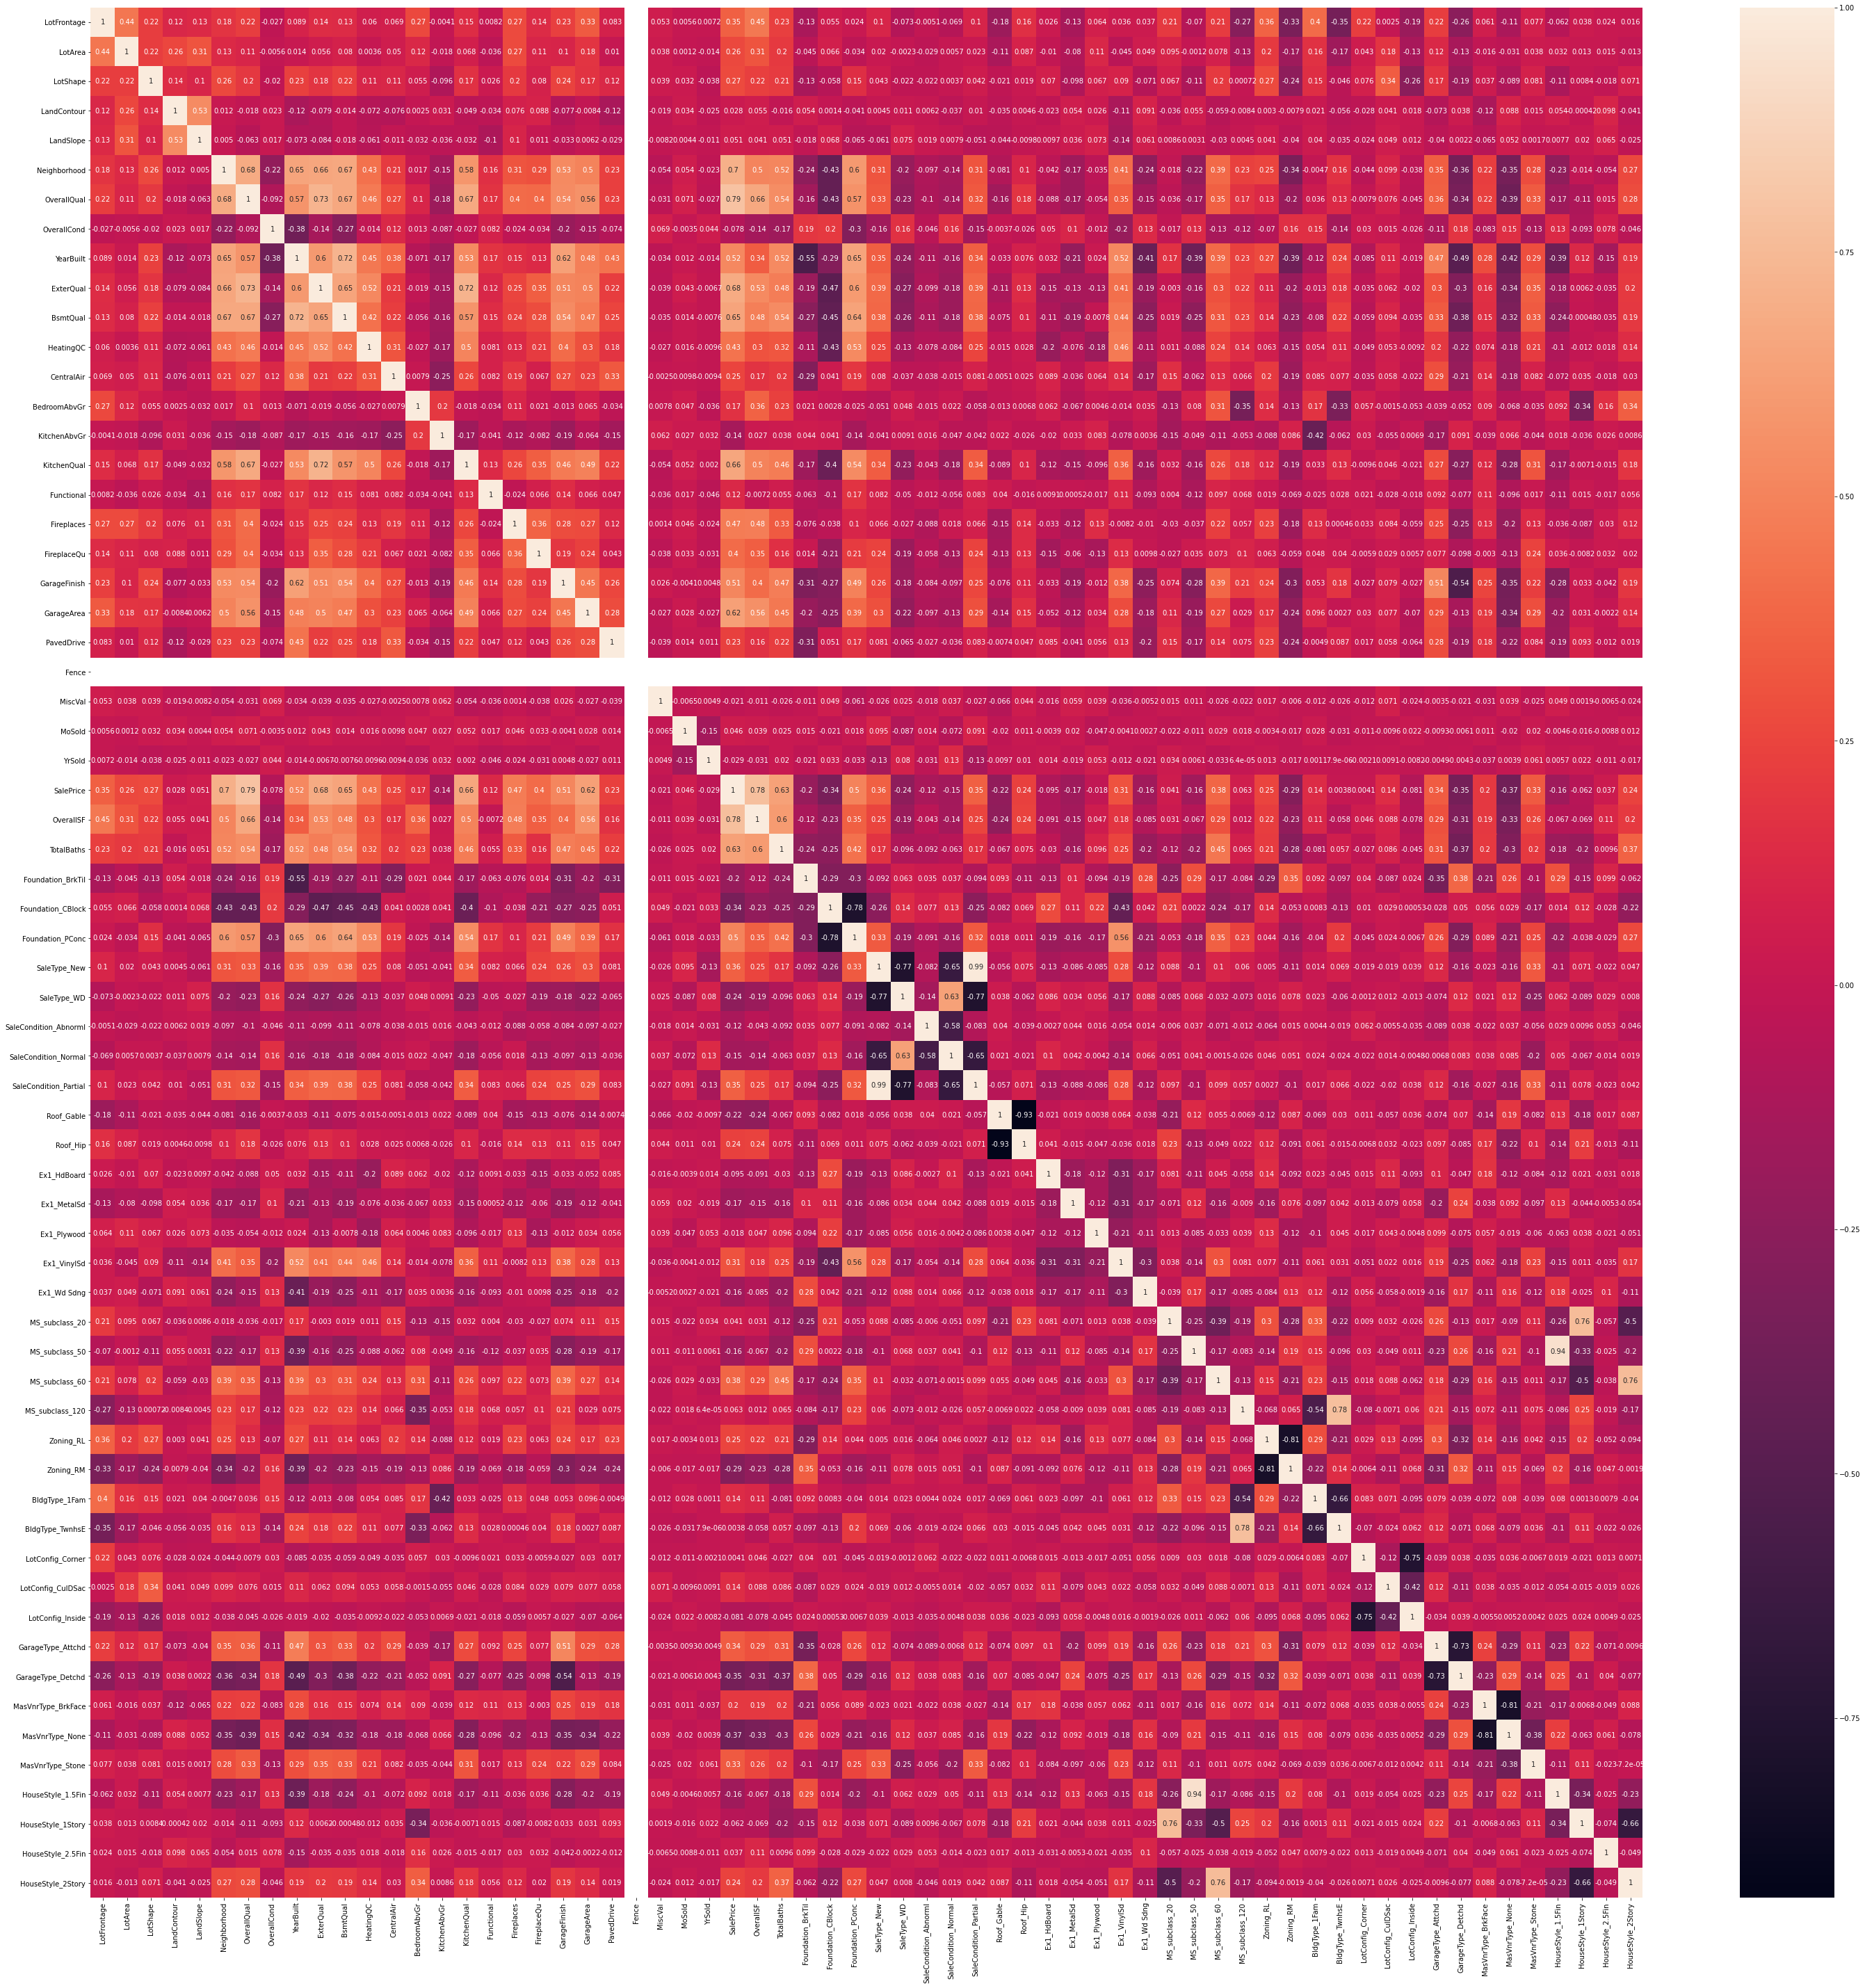

In [37]:
plt.subplots(figsize=(50,50))    
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [38]:
pd.set_option('display.max_rows', 100)
corrMatrix['SalePrice'].sort_values(ascending = False)

SalePrice                1.000000
OverallQual              0.790982
OverallSF                0.778959
Neighborhood             0.703487
ExterQual                0.682639
KitchenQual              0.659600
BsmtQual                 0.650138
TotalBaths               0.631731
GarageArea               0.623431
YearBuilt                0.522897
GarageFinish             0.513906
Foundation_PConc         0.497734
Fireplaces               0.466929
HeatingQC                0.427649
FireplaceQu              0.401053
MS_subclass_60           0.377197
SaleType_New             0.357509
SaleCondition_Partial    0.352060
LotFrontage              0.350510
GarageType_Attchd        0.335961
MasVnrType_Stone         0.330476
Ex1_VinylSd              0.305009
LotShape                 0.267672
LotArea                  0.263843
CentralAir               0.251328
Zoning_RL                0.245063
HouseStyle_2Story        0.242880
Roof_Hip                 0.235897
PavedDrive               0.231968
MasVnrType_Brk

## Run multiple linear regression

In [39]:
xvar = tr.drop(['SalePrice'], axis=1)
yvar = tr['SalePrice'].to_frame()

(array([  1.,   2.,   3.,  15.,  31.,  52., 107., 164., 176., 219., 200.,
        160., 127.,  72.,  56.,  20.,  16.,   5.,   7.,   6.]),
 array([-80000., -72000., -64000., -56000., -48000., -40000., -32000.,
        -24000., -16000.,  -8000.,      0.,   8000.,  16000.,  24000.,
         32000.,  40000.,  48000.,  56000.,  64000.,  72000.,  80000.]),
 <BarContainer object of 20 artists>)

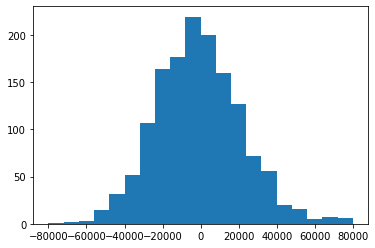

In [40]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(xvar, yvar)
residuals = yvar - lm.predict(xvar)
plt.hist(residuals, bins = 20, range = (-80000, 80000))

In [41]:
ex_add_const = sm.add_constant(xvar)
model = sm.OLS(yvar, ex_add_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.837
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     115.9
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:24:00   Log-Likelihood:                -17219.
No. Observations:                1460   AIC:                         3.456e+04
Df Residuals:                    1397   BIC:                         3.490e+04
Df Model:                          62                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
LotFrontage            -104.25

#### Select dominant features

In [42]:
# feature_list = list(corrMatrix.SalePrice[corrMatrix.SalePrice >= 0.45].index)
# feature_list

In [43]:
pValues = results.pvalues.sort_values()
print(pValues)

OverallSF                1.694285e-39
Neighborhood             6.773349e-25
OverallQual              3.611206e-19
TotalBaths               4.870302e-11
GarageArea               3.737512e-08
BsmtQual                 6.896651e-07
OverallCond              1.019302e-06
KitchenQual              2.517139e-05
Foundation_BrkTil        1.165740e-04
Fireplaces               4.242921e-04
LandSlope                1.544770e-03
Foundation_PConc         3.296752e-03
Foundation_CBlock        5.309565e-03
LotArea                  5.963561e-03
LotConfig_CulDSac        6.863566e-03
YearBuilt                8.338956e-03
Functional               1.025468e-02
GarageType_Attchd        1.514080e-02
MS_subclass_60           1.661745e-02
MS_subclass_120          1.956523e-02
ExterQual                2.496051e-02
SaleType_New             3.952317e-02
GarageType_Detchd        4.359816e-02
Ex1_HdBoard              4.380893e-02
LotFrontage              4.800157e-02
Ex1_Plywood              5.179751e-02
Ex1_VinylSd 

In [44]:
feature_list = pValues[pValues<0.05].index
feature_list


Index(['OverallSF', 'Neighborhood', 'OverallQual', 'TotalBaths', 'GarageArea',
       'BsmtQual', 'OverallCond', 'KitchenQual', 'Foundation_BrkTil',
       'Fireplaces', 'LandSlope', 'Foundation_PConc', 'Foundation_CBlock',
       'LotArea', 'LotConfig_CulDSac', 'YearBuilt', 'Functional',
       'GarageType_Attchd', 'MS_subclass_60', 'MS_subclass_120', 'ExterQual',
       'SaleType_New', 'GarageType_Detchd', 'Ex1_HdBoard', 'LotFrontage'],
      dtype='object')

In [45]:
tr2 = tr[feature_list]
tr2.columns

Index(['OverallSF', 'Neighborhood', 'OverallQual', 'TotalBaths', 'GarageArea',
       'BsmtQual', 'OverallCond', 'KitchenQual', 'Foundation_BrkTil',
       'Fireplaces', 'LandSlope', 'Foundation_PConc', 'Foundation_CBlock',
       'LotArea', 'LotConfig_CulDSac', 'YearBuilt', 'Functional',
       'GarageType_Attchd', 'MS_subclass_60', 'MS_subclass_120', 'ExterQual',
       'SaleType_New', 'GarageType_Detchd', 'Ex1_HdBoard', 'LotFrontage'],
      dtype='object')

In [46]:
xvar2 = tr2

(array([  1.,   3.,   7.,  13.,  35.,  65., 100., 149., 181., 219., 164.,
        179., 135.,  82.,  45.,  25.,  10.,  11.,   8.,   5.]),
 array([-80000., -72000., -64000., -56000., -48000., -40000., -32000.,
        -24000., -16000.,  -8000.,      0.,   8000.,  16000.,  24000.,
         32000.,  40000.,  48000.,  56000.,  64000.,  72000.,  80000.]),
 <BarContainer object of 20 artists>)

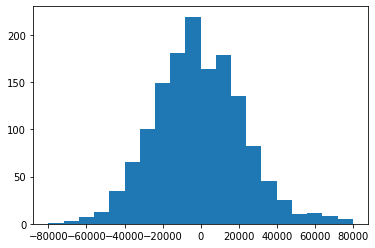

In [47]:
lm = LinearRegression()
lm.fit(xvar2, yvar)
residuals = yvar - lm.predict(xvar2)
plt.hist(residuals, bins = 20, range = (-80000, 80000))

In [48]:
ex_add_const = sm.add_constant(xvar2)
model = sm.OLS(yvar, ex_add_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.828
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     275.2
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:24:00   Log-Likelihood:                -17261.
No. Observations:                1460   AIC:                         3.457e+04
Df Residuals:                    1434   BIC:                         3.471e+04
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const              2.271e+05   1.25e+0

#### Apply log transform

(array([  0.,   2.,   2.,   3.,   3.,   4.,  11.,  42., 168., 476., 462.,
        218.,  52.,  12.,   3.,   0.,   0.,   0.,   0.,   0.]),
 array([-1. , -0.9, -0.8, -0.7, -0.6, -0.5, -0.4, -0.3, -0.2, -0.1,  0. ,
         0.1,  0.2,  0.3,  0.4,  0.5,  0.6,  0.7,  0.8,  0.9,  1. ]),
 <BarContainer object of 20 artists>)

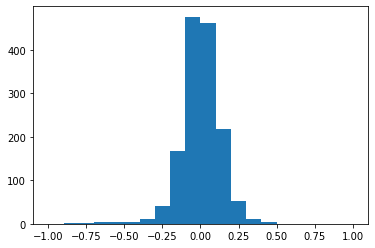

In [49]:
lm = LinearRegression()
lm.fit(xvar2, np.log(yvar))
residuals = np.log(yvar) - lm.predict(xvar2)
plt.hist(residuals, bins = 20, range = (-1, 1))

In [50]:
ex_add_const = sm.add_constant(xvar2)
model = sm.OLS(np.log(yvar), ex_add_const)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:              SalePrice   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.866
Method:                 Least Squares   F-statistic:                     376.9
Date:                Fri, 12 Feb 2021   Prob (F-statistic):               0.00
Time:                        01:24:00   Log-Likelihood:                 746.29
No. Observations:                1460   AIC:                            -1441.
Df Residuals:                    1434   BIC:                            -1303.
Df Model:                          25                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 8.3434      0.55

In [51]:
mean_squared_error(np.log(yvar), lm.predict(xvar2), squared=False)

0.14513424317247794

## Lasso model

In [52]:
lasso.set_params(alpha=1.0)
lasso_mod = lasso.fit(xvar2, np.log(yvar))
lasso.score(xvar2, np.log(yvar))

0.7337472476350961

In [53]:
mean_squared_error(np.log(yvar), lasso.predict(xvar2), squared=False)

0.20604530724012932

In [54]:
lasso_params = {'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]}

gs = GridSearchCV(lasso, param_grid = lasso_params)
gs.fit(np.log(yvar), xvar2).best_estimator_


Lasso(alpha=0.1)

#### Cross validation

In [55]:
# 70/30 train/test set cross validation

try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
trainX, testX, trainY, testY = train_test_split(xvar2, yvar, test_size=0.3, random_state=42)

# np.random.seed(1)
# testIdxes = np.random.choice(range(1460), size= 438, replace=False)
# trainIdxes = list(set(range(1460))-set(testIdxes))

# trainX = xvar2.iloc[trainIdxes]
# testX  = xvar2.iloc[testIdxes]
# trainY = yvar.iloc[trainIdxes]
# testY  = yvar.iloc[testIdxes]

In [56]:
train_R2 = []
test_R2  = []
original_R2 = []
alphaRange = np.linspace(1e-3,1,30)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=False)  
    lasso.fit(trainX, np.log(trainY))
    train_R2.append(r2_score(np.log(trainY), lasso_mod.predict(trainX).reshape(-1,1)))
    test_R2.append(r2_score(np.log(testY), lasso_mod.predict(testX).reshape(-1,1)))
#     train_R2.append(lasso.score(trainX, np.log(trainY)))
#     test_R2.append(lasso.score(testX, np.log(testY)))
    original_R2.append(lasso.score(xvar2, np.log(yvar)))

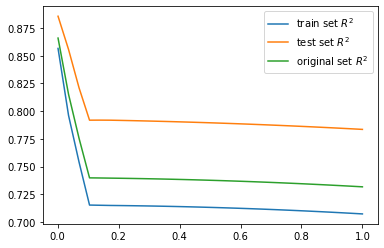

In [57]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.plot(alphaRange, original_R2, label=r'original set $R^2$')
plt.legend(loc=1)

In [58]:
train_RMSE = []
test_RMSE  = []
original_RMSE = []
alphaRange = np.linspace(1e-3,1,30)
for alpha in alphaRange:
    lasso.set_params(alpha=alpha, normalize=False)  
    lasso.fit(trainX, np.log(trainY))
    train_RMSE.append(mean_squared_error(np.log(trainY), lasso.predict(trainX), squared=False))
    test_RMSE.append(mean_squared_error(np.log(testY), lasso.predict(testX), squared=False))
    original_RMSE.append(mean_squared_error(np.log(yvar), lasso.predict(xvar2), squared=False))

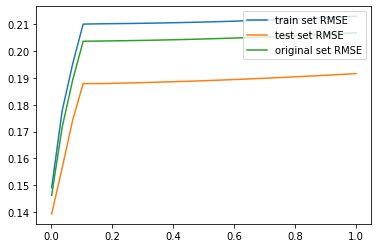

In [59]:
plt.plot(alphaRange, train_RMSE, label=r'train set RMSE')
plt.plot(alphaRange, test_RMSE, label=r'test set RMSE')
plt.plot(alphaRange, original_RMSE, label=r'original set RMSE')
plt.legend(loc=1)

In [60]:
kf = KFold(n_splits=10)

#### Re-run with optimal lambda

In [61]:
lasso.set_params(alpha=0.01)
lasso.fit(xvar2, np.log(yvar))
lasso.score(xvar2, np.log(yvar))

0.8546329081438029

In [62]:
mean_squared_error(np.log(yvar), lasso.predict(xvar2), squared=False)

0.1522469937606941

## Ridge model

In [63]:
ridge.set_params(alpha=1.0)
ridge.fit(xvar2, np.log(yvar))
ridge.score(xvar2, np.log(yvar))

0.8678969222863351

In [64]:
mean_squared_error(np.log(yvar), ridge.predict(xvar2), squared=False)

0.14513499513365244

#### Cross validation

In [65]:
# 70/30 train/test set cross validation

try:
    from sklearn.model_selection import train_test_split
except:
    from sklearn.cross_validation import train_test_split
trainX, testX, trainY, testY = train_test_split(xvar2, yvar, test_size=0.3, random_state=42)

# np.random.seed(1)
# testIdxes = np.random.choice(range(1460), size= 438, replace=False)
# trainIdxes = list(set(range(1460))-set(testIdxes))

# trainX = xvar2.iloc[trainIdxes]
# testX  = xvar2.iloc[testIdxes]
# trainY = yvar.iloc[trainIdxes]
# testY  = yvar.iloc[testIdxes]

In [66]:
train_R2 = []
test_R2  = []
original_R2 = []
alphaRange = np.linspace(1e-3,20,30)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(trainX, np.log(trainY))
    train_R2.append(ridge.score(trainX, np.log(trainY)))
    test_R2.append(ridge.score(testX, np.log(testY)))
    original_R2.append(ridge.score(xvar2, np.log(yvar)))

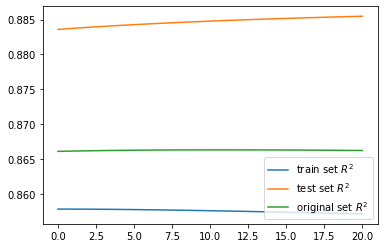

In [67]:
plt.plot(alphaRange, train_R2, label=r'train set $R^2$')
plt.plot(alphaRange, test_R2, label=r'test set $R^2$')
plt.plot(alphaRange, original_R2, label=r'original set $R^2$')
plt.legend(loc=4)

In [68]:
train_RMSE = []
test_RMSE  = []
original_RMSE = []
alphaRange = np.linspace(1e-3,20,30)
for alpha in alphaRange:
    ridge.set_params(alpha=alpha, normalize=False)  
    ridge.fit(trainX, np.log(trainY))
    train_RMSE.append(mean_squared_error(np.log(trainY), ridge.predict(trainX), squared=False))
    test_RMSE.append(mean_squared_error(np.log(testY), ridge.predict(testX), squared=False))
    original_RMSE.append(mean_squared_error(np.log(yvar), ridge.predict(xvar2), squared=False))

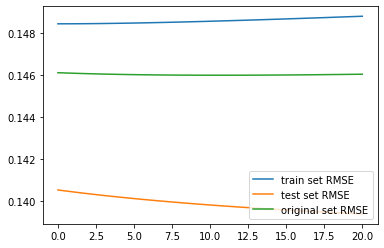

In [69]:
plt.plot(alphaRange, train_RMSE, label=r'train set RMSE')
plt.plot(alphaRange, test_RMSE, label=r'test set RMSE')
plt.plot(alphaRange, original_RMSE, label=r'original set RMSE')
plt.legend(loc=4)

#### Re-run with optimal lambda

In [70]:
ridge.set_params(alpha=5)
ridge.fit(xvar2, np.log(yvar))
ridge.score(xvar2, np.log(yvar))

0.8678693978401518

In [71]:
mean_squared_error(np.log(yvar), ridge.predict(xvar2), squared=False)

0.14515011420722282

## Process test file

In [72]:
missing = np.sum(te.isnull())
missing[missing>0].sort_values(ascending = False)

PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageCond        78
GarageQual        78
GarageFinish      78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType1      42
BsmtFinType2      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
BsmtFullBath       2
BsmtHalfBath       2
Utilities          2
Functional         2
Exterior2nd        1
Exterior1st        1
SaleType           1
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
KitchenQual        1
GarageCars         1
GarageArea         1
TotalBsmtSF        1
dtype: int64

In [73]:
te = te.drop(['PoolQC', 'PoolArea', 'MiscFeature', 'Alley'], axis = 1)
te['OverallSF'] = te['TotalBsmtSF'] + te['GrLivArea']
te['TotalBaths'] = te['FullBath'] + te['BsmtFullBath'] + 0.5 * (te['HalfBath'] + te['BsmtHalfBath'])
te['TotalBaths'] = te['FullBath'] + te['BsmtFullBath'] + 0.5 * (te['HalfBath'] + te['BsmtHalfBath'])
te.drop(['GarageCars', 'GarageYrBlt', 'YearRemodAdd', 'Exterior2nd', 'ExterCond', 'BsmtCond', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'FullBath', 'BsmtFullBath', 'HalfBath', 'BsmtHalfBath', 'TotRmsAbvGrd', 'MasVnrArea'], axis = 1, inplace= True)
te.drop(['Street', 'Utilities', 'Condition1', 'Condition2', 'RoofMatl', 'Heating', 'GarageQual', 'GarageCond', 'Electrical'], axis = 1, inplace= True)
te['Fence'] = te['Fence'].fillna('NE')
te['FireplaceQu'] = te['FireplaceQu'].fillna('TA')
te['BsmtQual'] = te['BsmtQual'].fillna('TA')
te['KitchenQual'] = te['KitchenQual'].fillna('TA')
te['GarageType'] = te['GarageType'].fillna('NE')
te['GarageFinish'] = te['GarageFinish'].fillna('NE')
te['GarageArea'] = te['GarageArea'].fillna(472)
te['MasVnrType'] = te['MasVnrType'].fillna('None')
te['MSZoning'] = te['MSZoning'].fillna('RL')
te['TotalBaths'] = te['TotalBaths'].fillna(2.2)
te['OverallSF'] = te['OverallSF'].fillna(2500)
te['LotArea'] = te['LotArea'].fillna(10500)
te['Functional'] = te['Functional'].fillna('Typ')
te['SaleType'] = te['SaleType'].fillna('WD')
te['Exterior1st'] = te['Exterior1st'].fillna('VinylSd')

LotFrontage = te['LotFrontage'].tolist()
OverallSF = te['OverallSF'].tolist()
LotArea = te['LotArea'].tolist()
data = {'LotFrontage': LotFrontage, 'OverallSF': OverallSF, 'LotArea' :LotArea}
lot = pd.DataFrame(data)
imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(lot)
lot_imputed = pd.DataFrame(imputed, columns=lot.columns, index=range(0, 1459))
te['LotFrontage'] = lot_imputed['LotFrontage']

te['LotShape'] =  te.LotShape.map(lambda x: 0 if x == 'Reg' else 1) #return 0 if regular lot shape, 1 if irregular
te['LandContour'] =  te.LandContour.map(lambda x: 0 if x == 'Lvl' else 1) #return 0 if flat land contour, 1 if non-flat
te['LandSlope'] = te.LandSlope.map(lambda x: 0 if x == 'Gtl' else 1) #return 0 if gentle slope, 1 if moderate/severe
te['GarageFinish'] =  te.GarageFinish.map(lambda x: 1 if x == 'Fin' or x == 'RFn' else 0) #return 1 if finished, 0 if non-finished
te['CentralAir'] =  te.CentralAir.map(lambda x: 1 if x == 'Y' else 0) #return 1 if Y, 0 if N
te['PavedDrive'] =  te.PavedDrive.map(lambda x: 1 if x == 'Y' else 0) #return 1 if paved driveway, 0 if non-paved
te['Functional'] =  te.Functional.map(lambda x: 1 if x == 'Typ' else 0) #return 1 if typical, 0 if deductions
te['Fence'] =  te.Fence.map(lambda x: 0 if x == 'Ne' else 1) #return 0 if no fence, 1 if fence
te['Neighborhood'] = te['Neighborhood'].map(lambda x: np.where(x in ["NoRidge","NridgHt","StoneBr"],2, np.where(x in ["Timber", "Veenker",
"Somerst","ClearCr","Crawfor","CollgCr","Blmngtn","Gilbert","NWAmes","SawyerW"],1, 0)))


dummy1 = pd.get_dummies(te.Foundation, prefix='Foundation')
dummy1.drop(['Foundation_Slab', 'Foundation_Stone', 'Foundation_Wood'], axis = 1, inplace= True)
dummy2 = pd.get_dummies(te.SaleType, prefix='SaleType')
dummy2.drop(['SaleType_COD', 'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_CWD', 'SaleType_Oth', 'SaleType_Con'], axis = 1, inplace= True)
dummy3 = pd.get_dummies(te.SaleCondition, prefix='SaleCondition')
dummy3.drop(['SaleCondition_Family', 'SaleCondition_Alloca', 'SaleCondition_AdjLand'], axis = 1, inplace= True)
dummy4 = pd.get_dummies(te.RoofStyle, prefix='Roof')
dummy4.drop(['Roof_Flat', 'Roof_Gambrel', 'Roof_Mansard', 'Roof_Shed'], axis = 1, inplace= True)
dummy5 = pd.get_dummies(te.Exterior1st, prefix='Ex1')
dummy5.drop(['Ex1_CemntBd', 'Ex1_BrkFace', 'Ex1_WdShing', 'Ex1_Stucco', 'Ex1_AsbShng', 'Ex1_BrkComm', 'Ex1_AsphShn', 'Ex1_CBlock'], axis = 1, inplace= True) #'Ex1_Stone', 'Ex1_ImStucc'
dummy6 = pd.get_dummies(te.MSSubClass, prefix='MS_subclass')
dummy6.drop(['MS_subclass_30', 'MS_subclass_160', 'MS_subclass_70', 'MS_subclass_80', 'MS_subclass_90', 'MS_subclass_190', 'MS_subclass_85', 'MS_subclass_75', 'MS_subclass_45', 'MS_subclass_180', 'MS_subclass_40'], axis = 1, inplace= True)
dummy7 = pd.get_dummies(te.MSZoning, prefix='Zoning')
dummy7.drop(['Zoning_FV', 'Zoning_RH', 'Zoning_C (all)'], axis = 1, inplace= True)
dummy8 = pd.get_dummies(te.BldgType, prefix='BldgType')
dummy8.drop(['BldgType_Duplex', 'BldgType_Twnhs', 'BldgType_2fmCon'], axis = 1, inplace= True)
dummy9 = pd.get_dummies(te.LotConfig, prefix='LotConfig')
dummy9.drop(['LotConfig_FR2', 'LotConfig_FR3'], axis = 1, inplace= True)
dummy10 = pd.get_dummies(te.GarageType, prefix='GarageType')
dummy10.drop(['GarageType_BuiltIn', 'GarageType_NE', 'GarageType_Basment', 'GarageType_CarPort', 'GarageType_2Types'], axis = 1, inplace= True)
dummy11 = pd.get_dummies(te.MasVnrType, prefix='MasVnrType')
dummy11.drop(['MasVnrType_BrkCmn'], axis = 1, inplace= True)
dummy12 = pd.get_dummies(te.HouseStyle, prefix='HouseStyle')
dummy12.drop(['HouseStyle_SLvl', 'HouseStyle_SFoyer', 'HouseStyle_1.5Unf', 'HouseStyle_2.5Unf'], axis = 1, inplace= True) #'HouseStyle_2.5Fin'


te = te.drop(['Foundation', 'SaleType', 'SaleCondition', 'RoofStyle', 'Exterior1st', 'MSSubClass', 'MSZoning', 'BldgType', 'LotConfig', 'GarageType', 'MasVnrType', 'HouseStyle'], axis = 1)
te = pd.concat([te, dummy1, dummy2, dummy3, dummy4, dummy5, dummy6, dummy7, dummy8, dummy9, dummy10, dummy11, dummy12], axis = 1)



ordinal_dict = {"HeatingQC": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "FireplaceQu": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "ExterQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4},
                "BsmtQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4, "NE": 2},
                "KitchenQual": {"Po": 0, "Fa": 1, "TA": 2, "Gd": 3, "Ex": 4}}

te = te.replace(ordinal_dict)

In [74]:
missing = np.sum(te.isnull())
missing[missing>0].sort_values(ascending = False)

Series([], dtype: int64)

In [75]:
te.columns

Index(['Id', 'LotFrontage', 'LotArea', 'LotShape', 'LandContour', 'LandSlope',
       'Neighborhood', 'OverallQual', 'OverallCond', 'YearBuilt', 'ExterQual',
       'BsmtQual', 'HeatingQC', 'CentralAir', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'Functional', 'Fireplaces', 'FireplaceQu',
       'GarageFinish', 'GarageArea', 'PavedDrive', 'Fence', 'MiscVal',
       'MoSold', 'YrSold', 'OverallSF', 'TotalBaths', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_PConc', 'SaleType_New', 'SaleType_WD',
       'SaleCondition_Abnorml', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'Roof_Gable', 'Roof_Hip', 'Ex1_HdBoard',
       'Ex1_MetalSd', 'Ex1_Plywood', 'Ex1_VinylSd', 'Ex1_Wd Sdng',
       'MS_subclass_20', 'MS_subclass_50', 'MS_subclass_60', 'MS_subclass_120',
       'MS_subclass_150', 'Zoning_RL', 'Zoning_RM', 'BldgType_1Fam',
       'BldgType_TwnhsE', 'LotConfig_Corner', 'LotConfig_CulDSac',
       'LotConfig_Inside', 'GarageType_Attchd', 'GarageType_De

In [76]:
tec = te[feature_list]

In [85]:
sale = pd.DataFrame(math.e**lm.predict(tec), columns = ['SalePrice'])

In [78]:
sale.to_csv('saleprice.csv')

In [79]:
# coefs = []
# intercepts = []
# R2  = []
# alphaRange = np.linspace(1e-3,10,20)
# for alpha in alphaRange:
#     ridge.set_params(alpha=alpha, normalize = True)  
#     ridge.fit(xvar2, np.log(yvar))
#     intercepts.append(lasso.intercept_)
#     coefs.append(ridge.coef_)
#     R2.append(ridge.score(xvar2, np.log(yvar)))

In [80]:
# plt.plot(alphaRange, intercepts)
# plt.title('Change of Ridge Intercept Varying Alpha')

In [81]:
# coefs = pd.DataFrame(np.array(coefs), columns=xvar2.columns)

# plt.figure(figsize=(8,5))
# for name in coefs.columns:
#     plt.plot(alphaRange, coefs[name], label=name)
# plt.legend(loc=1)
# plt.title('Change of Ridge Slopes Varying Alpha')

In [82]:
# ridge.set_params(alpha=45)
# ridge.fit(xvar2, np.log(yvar))
# coefDF = pd.Series(ridge.coef_, index=xvar2.columns)
# print('The intercept is %.4f' %(ridge.intercept_))
# print('The slopes are \n %s' %(coefDF))